Importing All necessary Libraries

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Calculation of centralities

## Calculation of Degree Centrality

### Calculation of Degree Centrality using Linear Algebra

No of Nodes in the Graph is 34
The Adjacency Matrix corresponding to the graph is:
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]
The Graph is


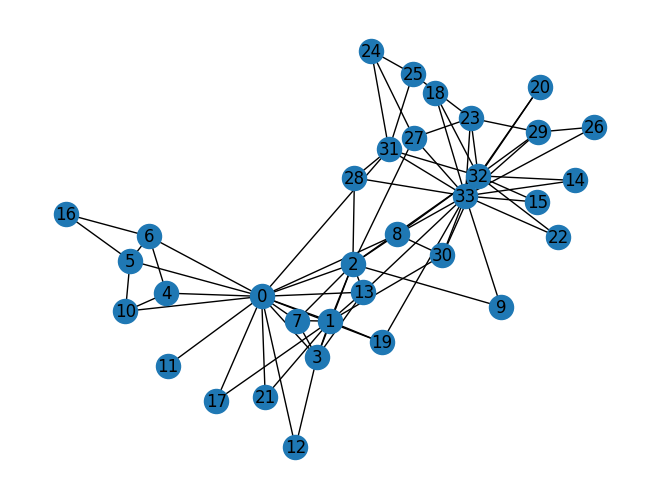

Degree Centrality using LA:
{0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151}


In [2]:
def compute_degree_centrality(adj_matrix):
    num_nodes = adj_matrix.shape[0]
    
    degree_centrality = np.sum(adj_matrix, axis=1)
    
    normalization_factor = num_nodes - 1
    
    degree_centrality = degree_centrality.astype(float) / normalization_factor  

    return dict(enumerate(degree_centrality))
        

G = nx.karate_club_graph()

weighted_adjacency_matrix = nx.to_numpy_array(G)

unweighted_adjacency_matrix = (weighted_adjacency_matrix > 0).astype(int)

print(f"No of Nodes in the Graph is {unweighted_adjacency_matrix.shape[0]}")
print("The Adjacency Matrix corresponding to the graph is:")
print(unweighted_adjacency_matrix)


print("The Graph is")
nx.draw(G,with_labels=True)
plt.show()

degree_centrality_LA = compute_degree_centrality(unweighted_adjacency_matrix)

print("Degree Centrality using LA:")
print(degree_centrality_LA)

### Calculation of Degree Centrality Using In-Built Function

In [3]:
degree_centrality_inBuilt = nx.degree_centrality(G)
print("Degree Centrality InBuilt:")
print(degree_centrality_inBuilt)

Degree Centrality InBuilt:
{0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151}


Function for comparison of two dictionaries based on some precision

In [4]:
def compare_dictionaries(dict1, dict2, precision):
    for key in dict1.keys():
        if key not in dict2:
            return False
        value1 = dict1[key]
        value2 = dict2[key]
        if (round(value1, precision) != round(value2, precision)):
            return False
    return True

### Comparison of the Degree Centrality Obtained by calculation using Linear Algebra and using Inbuilt function of networkx

In [5]:
DecimalPlaces = 15

if compare_dictionaries(degree_centrality_inBuilt,degree_centrality_LA,DecimalPlaces):
    print("The both dictionaries are equal")
else:
    print("The both dictionaries are not equal")

The both dictionaries are equal


## Calculation of Betweenness Centrality

### Calculation of Betweenness Centrality using LA

In [6]:
def compute_betweenness_centrality(graph):
    nodes = graph.nodes()
    betweenness_centrality = {node: 0.0 for node in nodes}
    
    for source in nodes:
        betweenness = {node: 0.0 for node in nodes}
        stack = []
        distance = {node: -1 for node in nodes}
        sigma = {node: 0 for node in nodes}
        distance[source] = 0
        sigma[source] = 1
        queue = [source]
        
        while queue:
            node = queue.pop(0)
            stack.append(node)
            
            for neighbor in graph.neighbors(node):
                if distance[neighbor] == -1:
                    queue.append(neighbor)
                    distance[neighbor] = distance[node] + 1
                
                if distance[neighbor] == distance[node] + 1:
                    sigma[neighbor] += sigma[node]
    
        dependency = {node: 0.0 for node in nodes}
        while stack:
            node = stack.pop()
            for predecessor in graph.neighbors(node):
                if distance[predecessor] == distance[node] - 1:
                    dependency[predecessor] += (1 + dependency[node]) * sigma[predecessor] / sigma[node]
            
            if node != source:
                betweenness[node] += dependency[node]
        
        for node in nodes:
            if node != source:
                betweenness_centrality[node] += betweenness[node]
    
    num_nodes = len(nodes)
    normalization_factor = ((num_nodes - 1) * (num_nodes - 2))
    
    for node in nodes:
        betweenness_centrality[node] /= normalization_factor
    
    return betweenness_centrality


G = nx.karate_club_graph()

weighted_adjacency_matrix = nx.to_numpy_array(G)

print(f"The Weighted Adjacency matrix is\n{weighted_adjacency_matrix}")

betweenness_centrality_LA = compute_betweenness_centrality(G)

print("Betweenness Centrality computed using brandes algorithm")
print(betweenness_centrality_LA)

The Weighted Adjacency matrix is
[[0. 4. 5. ... 2. 0. 0.]
 [4. 0. 6. ... 0. 0. 0.]
 [5. 6. 0. ... 0. 2. 0.]
 ...
 [2. 0. 0. ... 0. 4. 4.]
 [0. 0. 2. ... 4. 0. 5.]
 [0. 0. 0. ... 4. 5. 0.]]
Betweenness Centrality computed using brandes algorithm
{0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.055926827801827804, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0324750481000481, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.022333453583453577, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976912, 31: 0.13827561327561322, 32: 0.14524711399711399, 33: 0.3040749759499759}


### Calculation of Betweenness Centrality using In-Built function

In [7]:
betweenness_centrality_inBuilt= nx.betweenness_centrality(G)
print("Betweenness Centrality computed using inBuilt function of networkx:")
print(betweenness_centrality_inBuilt)

Betweenness Centrality computed using inBuilt function of networkx:
{0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976909, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.30407497594997596}


### Comparison of the Betweenness Centrality Obtained by calculation using Linear Algebra and using Inbuilt function of networkx

In [8]:
if compare_dictionaries(betweenness_centrality_LA,betweenness_centrality_inBuilt,DecimalPlaces):
    print("Both the dictionaries are equal")
else:
    print("Both the dictionaries are not equal")

Both the dictionaries are equal


## Calculation of Closeness Centrality

### Calculation of Closeness Centrality using LA

In [9]:
def compute_closeness_centrality(graph):
    num_nodes = graph.number_of_nodes()

    closeness_scores = {}

    for node in graph.nodes():
        shortest_paths = nx.shortest_path_length(graph, source=node)

        total_distance = sum(shortest_paths.values())

        closeness_centrality = (num_nodes - 1) / total_distance

        closeness_scores[node] = closeness_centrality

    return closeness_scores


closeness_centrality_LA = compute_closeness_centrality(G)


print("Closeness Centrality computed using LA:")
print(closeness_centrality_LA)


Closeness Centrality computed using LA:
{0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0.38372093023255816, 6: 0.38372093023255816, 7: 0.44, 8: 0.515625, 9: 0.4342105263157895, 10: 0.3793103448275862, 11: 0.36666666666666664, 12: 0.3707865168539326, 13: 0.515625, 14: 0.3707865168539326, 15: 0.3707865168539326, 16: 0.28448275862068967, 17: 0.375, 18: 0.3707865168539326, 19: 0.5, 20: 0.3707865168539326, 21: 0.375, 22: 0.3707865168539326, 23: 0.39285714285714285, 24: 0.375, 25: 0.375, 26: 0.3626373626373626, 27: 0.4583333333333333, 28: 0.4520547945205479, 29: 0.38372093023255816, 30: 0.4583333333333333, 31: 0.5409836065573771, 32: 0.515625, 33: 0.55}


### Calculation of Closeness Centrality using In-Built function

In [10]:
closeness_centrality_inBuilt = nx.closeness_centrality(G)
print("Closeness Centrality using InBuilt function:")
print(closeness_centrality_inBuilt)

Closeness Centrality using InBuilt function:
{0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0.38372093023255816, 6: 0.38372093023255816, 7: 0.44, 8: 0.515625, 9: 0.4342105263157895, 10: 0.3793103448275862, 11: 0.36666666666666664, 12: 0.3707865168539326, 13: 0.515625, 14: 0.3707865168539326, 15: 0.3707865168539326, 16: 0.28448275862068967, 17: 0.375, 18: 0.3707865168539326, 19: 0.5, 20: 0.3707865168539326, 21: 0.375, 22: 0.3707865168539326, 23: 0.39285714285714285, 24: 0.375, 25: 0.375, 26: 0.3626373626373626, 27: 0.4583333333333333, 28: 0.4520547945205479, 29: 0.38372093023255816, 30: 0.4583333333333333, 31: 0.5409836065573771, 32: 0.515625, 33: 0.55}


### Comparison of the Closeness Centrality Obtained by calculation using Linear Algebra and using Inbuilt function of networkx

In [11]:
if compare_dictionaries(closeness_centrality_LA ,closeness_centrality_inBuilt, DecimalPlaces):
    print("Both the dictionaries are equal")
else:
    print("Both the dictionaries are not equal")

Both the dictionaries are equal


## Calculation of EigenVector Centrality

### Calculation of Eigenvector Centrality using LA

In [12]:
def eigenvector_centrality(adjacency_matrix, max_iterations=1000):
    A = np.array(adjacency_matrix)
    arr = np.ones(adjacency_matrix.shape[0])
    arr = arr.T
    for i in range(max_iterations):
        arr = A @ arr
        arr = arr/np.linalg.norm(arr)
    
    centrality_scores = dict(enumerate(arr))
    return centrality_scores


G = nx.karate_club_graph()

weighted_adjacency_matrix = nx.to_numpy_array(G)

unweighted_adjacency_matrix = (weighted_adjacency_matrix > 0).astype(int)

eigenvector_centrality_LA = eigenvector_centrality(unweighted_adjacency_matrix)
print("Eigenvector Centrality Computed Using LA:")
print(eigenvector_centrality_LA)

Eigenvector Centrality Computed Using LA:
{0: 0.35549144452456655, 1: 0.26595991955249165, 2: 0.31719250448643155, 3: 0.21117972037789023, 4: 0.07596881818306894, 5: 0.07948304511709947, 6: 0.07948304511709947, 7: 0.17095974804479633, 8: 0.22740390712540018, 9: 0.10267425072358623, 10: 0.07596881818306894, 11: 0.05285569749352132, 12: 0.08425462871671373, 13: 0.22647272014248127, 14: 0.10140326218952461, 15: 0.10140326218952461, 16: 0.023635628104591376, 17: 0.09239953819570258, 18: 0.10140326218952461, 19: 0.1479125102933875, 20: 0.10140326218952461, 21: 0.09239953819570258, 22: 0.10140326218952461, 23: 0.15011857186115288, 24: 0.05705244054116565, 25: 0.05920647491677849, 26: 0.07557941348827213, 27: 0.13347715338024013, 28: 0.13107782298371085, 29: 0.13496081926232786, 30: 0.17475830231435285, 31: 0.19103384140654378, 32: 0.30864421979104717, 33: 0.37336347029148315}


### Calculation of Eigenvector Centrality using In-Built function

In [13]:
eigenvector_centrality_inBuilt = nx.eigenvector_centrality(G)
print("Eigenvector Centrality using InBuilt function:")
print(eigenvector_centrality_inBuilt)

Eigenvector Centrality using InBuilt function:
{0: 0.35548349418519426, 1: 0.2659538704545024, 2: 0.3171893899684447, 3: 0.21117407832057056, 4: 0.0759664588165738, 5: 0.07948057788594245, 6: 0.07948057788594245, 7: 0.1709551149803543, 8: 0.22740509147166046, 9: 0.10267519030637756, 10: 0.0759664588165738, 11: 0.05285416945233646, 12: 0.08425192086558085, 13: 0.22646969838808145, 14: 0.10140627846270832, 15: 0.10140627846270832, 16: 0.02363479426059687, 17: 0.0923967566684595, 18: 0.10140627846270832, 19: 0.14791134007618667, 20: 0.10140627846270832, 21: 0.0923967566684595, 22: 0.10140627846270832, 23: 0.15012328691726787, 24: 0.057053735638028055, 25: 0.0592082025027901, 26: 0.07558192219009324, 27: 0.13347932684333308, 28: 0.13107925627221215, 29: 0.13496528673866567, 30: 0.17476027834493088, 31: 0.191036269797917, 32: 0.3086510477336959, 33: 0.37337121301323506}


### Comparison of the Eigenvector Centrality Obtained by calculation using Linear Algebra and using Inbuilt function of networkx

In [14]:
if compare_dictionaries(eigenvector_centrality_inBuilt ,eigenvector_centrality_inBuilt, 4):
    print("Both the dictionaries are equal")
else:
    print("Both the dictionaries are not equal")

Both the dictionaries are equal


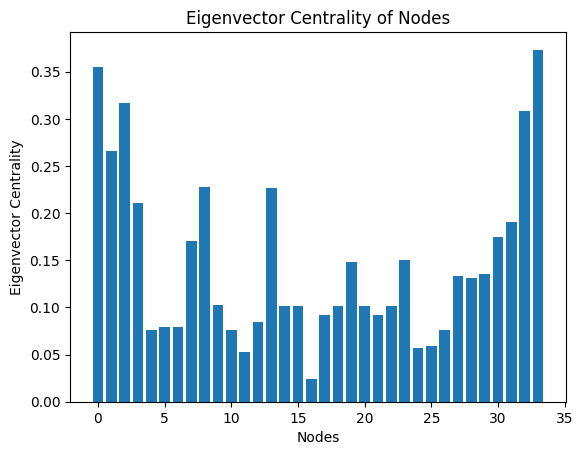

In [23]:
x = eigenvector_centrality_inBuilt.keys()
y = eigenvector_centrality_inBuilt.values()

plt.bar(x,y)
plt.title("Eigenvector Centrality of Nodes")
plt.xlabel("Nodes")
plt.ylabel("Eigenvector Centrality")
plt.show()

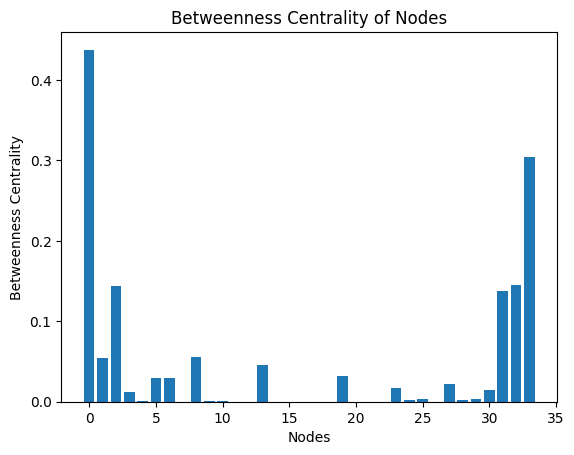

In [24]:
x = betweenness_centrality_inBuilt.keys()
y = betweenness_centrality_inBuilt.values()

plt.bar(x,y)
plt.title("Betweenness Centrality of Nodes")
plt.xlabel("Nodes")
plt.ylabel("Betweenness Centrality")
plt.show()

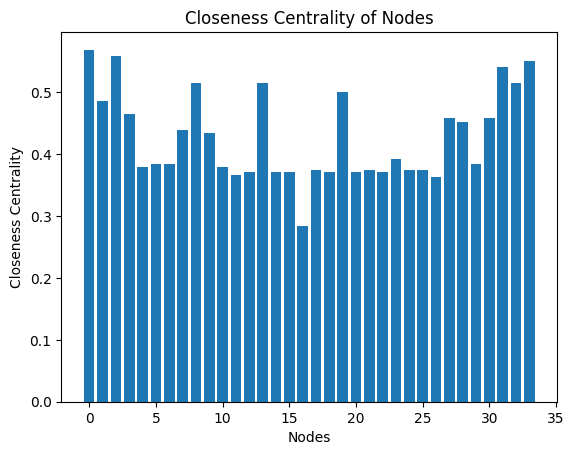

In [25]:
x = closeness_centrality_inBuilt.keys()
y = closeness_centrality_inBuilt.values()

plt.bar(x,y)
plt.title("Closeness Centrality of Nodes")
plt.xlabel("Nodes")
plt.ylabel("Closeness Centrality")
plt.show()

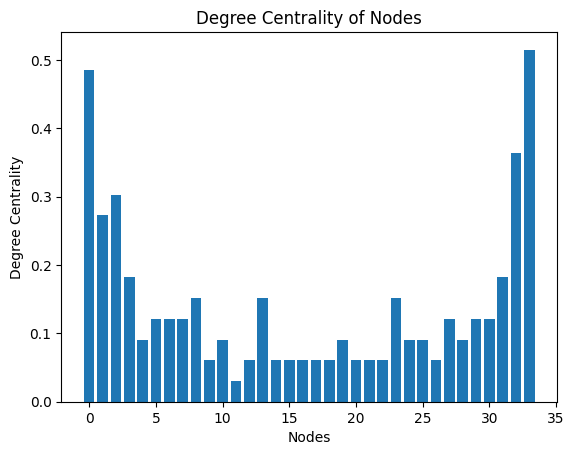

In [26]:
x = degree_centrality_inBuilt.keys()
y = degree_centrality_inBuilt.values()

plt.bar(x,y)
plt.title("Degree Centrality of Nodes")
plt.xlabel("Nodes")
plt.ylabel("Degree Centrality")
plt.show()

# Finding All Centralities of Facebook Data

## Taking 100 Edges

Max Degree Centrality Node:0 and It's Centrality:1.0
Max Betweenness Centrality Node:0 and It's Centrality:1.0
Max Closeness Centrality Node:0 and It's Centrality:1.0
Max Eigenvector Centrality Node:0 and It's Centrality:0.7071033667005829



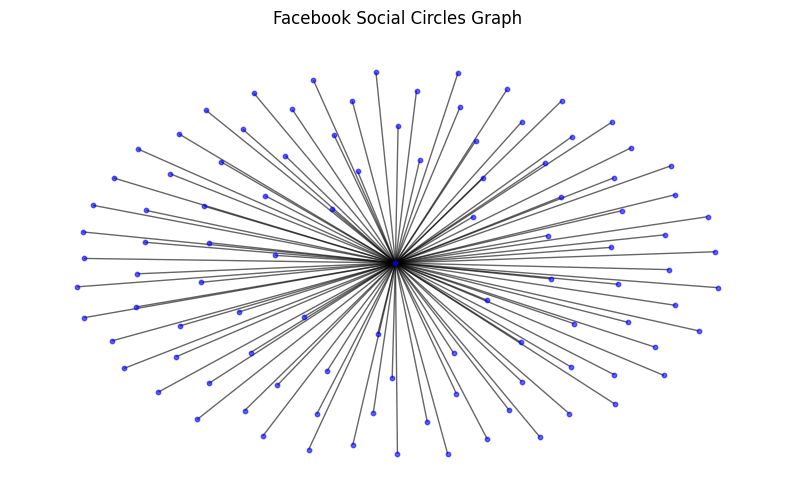

In [15]:
G = nx.Graph()

NumberofNodes = 100

with open("data.txt","r") as f:
    for i in range(NumberofNodes):
        data = f.readline()
        node1,node2 = data.strip().split(' ')
        G.add_edge(node1,node2)



degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

max_degree_centrality = max(degree_centrality,key=degree_centrality.get)
max_betweenness_centrality = max(betweenness_centrality,key=betweenness_centrality.get)
max_closeness_centrality = max(closeness_centrality,key=closeness_centrality.get)
max_eigenvector_centrality = max(eigenvector_centrality,key=eigenvector_centrality.get)


print(f"Max Degree Centrality Node:{max_degree_centrality} and It's Centrality:{degree_centrality[max_degree_centrality]}")
print(f"Max Betweenness Centrality Node:{max_betweenness_centrality} and It's Centrality:{betweenness_centrality[max_betweenness_centrality]}")
print(f"Max Closeness Centrality Node:{max_closeness_centrality} and It's Centrality:{closeness_centrality[max_closeness_centrality]}")
print(f"Max Eigenvector Centrality Node:{max_eigenvector_centrality} and It's Centrality:{eigenvector_centrality[max_eigenvector_centrality]}")
print()


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, with_labels=False, node_size=10, node_color='blue', alpha=0.6)
plt.title("Facebook Social Circles Graph")
plt.axis("off")
plt.show()

## Taking 1000 Edges

Max Degree Centrality Node:0 and It's Centrality:0.9914285714285714
Max Betweenness Centrality Node:0 and It's Centrality:0.927374266793833
Max Closeness Centrality Node:0 and It's Centrality:0.9915014164305949
Max Eigenvector Centrality Node:0 and It's Centrality:0.559416676755645



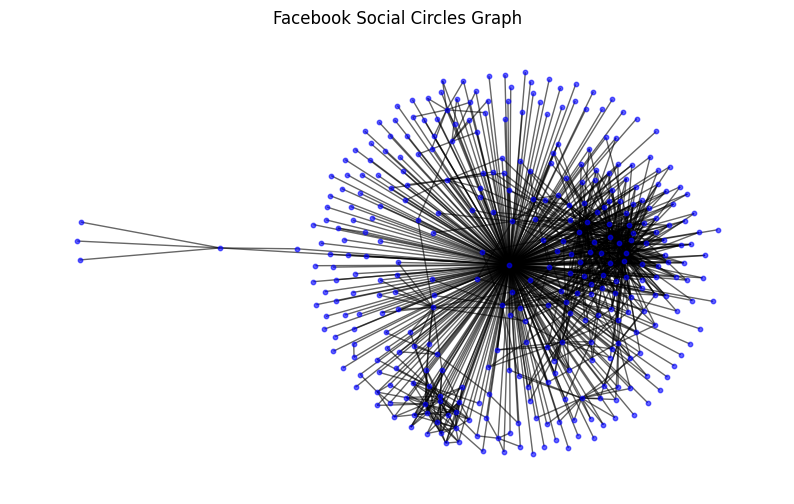

In [16]:
G = nx.Graph()

NumberofNodes = 1000

with open("data.txt","r") as f:
    for i in range(NumberofNodes):
        data = f.readline()
        node1,node2 = data.strip().split(' ')
        G.add_edge(node1,node2)



degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

max_degree_centrality = max(degree_centrality,key=degree_centrality.get)
max_betweenness_centrality = max(betweenness_centrality,key=betweenness_centrality.get)
max_closeness_centrality = max(closeness_centrality,key=closeness_centrality.get)
max_eigenvector_centrality = max(eigenvector_centrality,key=eigenvector_centrality.get)


print(f"Max Degree Centrality Node:{max_degree_centrality} and It's Centrality:{degree_centrality[max_degree_centrality]}")
print(f"Max Betweenness Centrality Node:{max_betweenness_centrality} and It's Centrality:{betweenness_centrality[max_betweenness_centrality]}")
print(f"Max Closeness Centrality Node:{max_closeness_centrality} and It's Centrality:{closeness_centrality[max_closeness_centrality]}")
print(f"Max Eigenvector Centrality Node:{max_eigenvector_centrality} and It's Centrality:{eigenvector_centrality[max_eigenvector_centrality]}")
print()


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, with_labels=False, node_size=10, node_color='blue', alpha=0.6)
plt.title("Facebook Social Circles Graph")
plt.axis("off")
plt.show()

## Taking 10000 Edges 

Max Degree Centrality Node:107 and It's Centrality:0.5222388805597201
Max Betweenness Centrality Node:107 and It's Centrality:0.6663327965109708
Max Closeness Centrality Node:107 and It's Centrality:0.6121482053413674
Max Eigenvector Centrality Node:348 and It's Centrality:0.1837055147302193



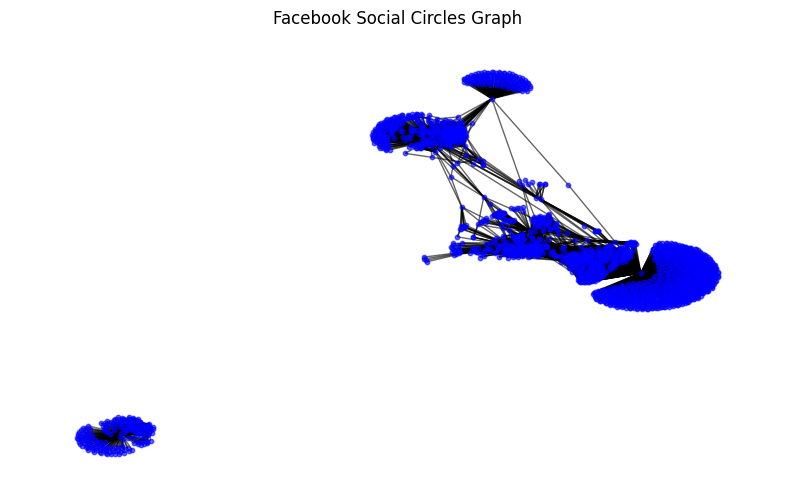

In [17]:
G = nx.Graph()

NumberofNodes = 10000

with open("data.txt","r") as f:
    for i in range(NumberofNodes):
        data = f.readline()
        node1,node2 = data.strip().split(' ')
        G.add_edge(node1,node2)



degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

max_degree_centrality = max(degree_centrality,key=degree_centrality.get)
max_betweenness_centrality = max(betweenness_centrality,key=betweenness_centrality.get)
max_closeness_centrality = max(closeness_centrality,key=closeness_centrality.get)
max_eigenvector_centrality = max(eigenvector_centrality,key=eigenvector_centrality.get)


print(f"Max Degree Centrality Node:{max_degree_centrality} and It's Centrality:{degree_centrality[max_degree_centrality]}")
print(f"Max Betweenness Centrality Node:{max_betweenness_centrality} and It's Centrality:{betweenness_centrality[max_betweenness_centrality]}")
print(f"Max Closeness Centrality Node:{max_closeness_centrality} and It's Centrality:{closeness_centrality[max_closeness_centrality]}")
print(f"Max Eigenvector Centrality Node:{max_eigenvector_centrality} and It's Centrality:{eigenvector_centrality[max_eigenvector_centrality]}")
print()


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, with_labels=False, node_size=10, node_color='blue', alpha=0.6)
plt.title("Facebook Social Circles Graph")
plt.axis("off")
plt.show()

## Taking all Edges

Max Degree Centrality Node:107 and It's Centrality:0.258791480931154
Max Betweenness Centrality Node:107 and It's Centrality:0.4805180785560152
Max Closeness Centrality Node:107 and It's Centrality:0.45969945355191255
Max Eigenvector Centrality Node:1912 and It's Centrality:0.09540696149067629



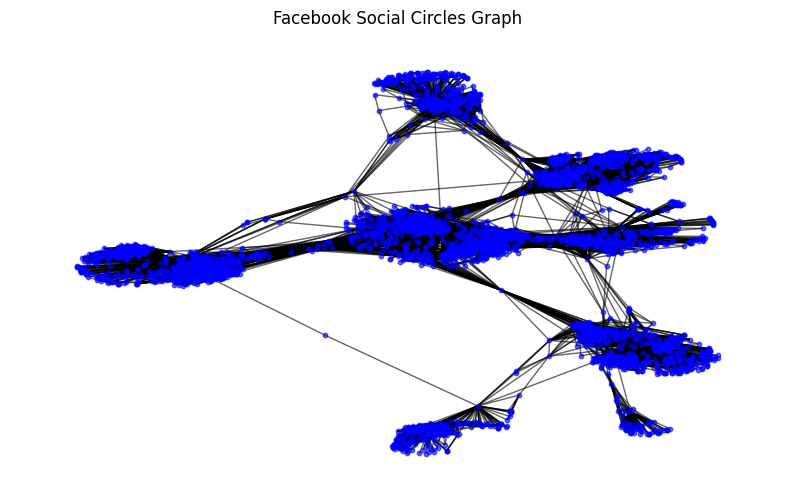

In [18]:
G = nx.Graph()

NumberofNodes = 88234

with open("data.txt","r") as f:
    for i in range(NumberofNodes):
        data = f.readline()
        node1,node2 = data.strip().split(' ')
        G.add_edge(node1,node2)


degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

max_degree_centrality = max(degree_centrality,key=degree_centrality.get)
max_betweenness_centrality = max(betweenness_centrality,key=betweenness_centrality.get)
max_closeness_centrality = max(closeness_centrality,key=closeness_centrality.get)
max_eigenvector_centrality = max(eigenvector_centrality,key=eigenvector_centrality.get)


print(f"Max Degree Centrality Node:{max_degree_centrality} and It's Centrality:{degree_centrality[max_degree_centrality]}")
print(f"Max Betweenness Centrality Node:{max_betweenness_centrality} and It's Centrality:{betweenness_centrality[max_betweenness_centrality]}")
print(f"Max Closeness Centrality Node:{max_closeness_centrality} and It's Centrality:{closeness_centrality[max_closeness_centrality]}")
print(f"Max Eigenvector Centrality Node:{max_eigenvector_centrality} and It's Centrality:{eigenvector_centrality[max_eigenvector_centrality]}")
print()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, with_labels=False, node_size=10, node_color='blue', alpha=0.6)
plt.title("Facebook Social Circles Graph")
plt.axis("off")
plt.show()